<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2016/17</h2>
<h3>Dr. Daniela Paolotti, Dr. Michele Tizzoni</h3>
<hr>
</center>

<center> 
## Project name: Alfabeto 

<h4>Student: Federico Cinus</h4>


<center> 
# Introduzione 

<center>
Alfabeto è un programma che ha lo scopo di classificare un testo in base alla lingua, sfruttando la teoria delle reti

<center>
L'idea è quella di mettere in evidenza i suoni più comuni in una lingua

<center>
Al fine di semplificare il problema si considerano:
<center>
1) due lingue (italiano e inglese)
<center>
2) approssimazione in cui i "suoni" sono coppie di lettere in una stessa parola


<center>
Alfabeto basa la sua analisi su una rete pesata

In particolare prende un file txt in input e crea una rete i cui nodi sono le lettere dell'alfabeto; 

i link vengono creati solo tra lettere vicine nella stessa parola; e.g. nella parola "alfabeto" i link saranno tra (a,l), (l,f), (f,a) etc. 

Se due lettere risultano vicine più di una volta all'interno del file txt, il peso del loro link corrispondente verrà aumentato di una unità

<center>
Le reti corrispondenti a testi in lingue differenti determinano reti con layout e caratteristiche distinte

<center> 
# Esempi di layout 

In [1]:
#librerie da importare
%pylab inline 
import string
import networkx as nx
import seaborn as sns
from sklearn.utils import shuffle
import powerlaw as pwl

Populating the interactive namespace from numpy and matplotlib


<center>
# Inglese

In [2]:
#file txt in input
f = open('Testo_inglese.txt', 'r')
fh = f.readlines()

#creo la lista di lettere
lista = []
for n_line in range(len(fh)):
    punctuation='!?,.:;"\')(_-{}[]1234567890*+/'
    line = fh[n_line].translate(None, punctuation).replace('\xc3\xb9','u').replace('\xc3\xa8', 'e').replace('\u00E9', 'e').replace('\xc3\xb2','o').replace('\u00F4', 'o').replace('\xc3\xa0', 'a').replace('\n',' ').replace('\n\n',' ').replace('\xc3\xac', 'i').replace('\xc3\xa9', 'e').lower()
    for word in line:
        for letter in word:
            lista.append(letter)
            
#rendo uguale la lunghezza dei due testi
lista = lista[:-934]

In [3]:
#creazione rete
G_en = nx.Graph()
alfabeto = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
G_en.add_nodes_from(alfabeto)

In [4]:
#creazione link
for i in range(len(lista)-1):
    #se non esiste il link tra due lettere lo creo
    if G_en.edges().count((lista[i],lista[i+1])) == 0:
        G_en.add_edge(lista[i],lista[i+1], weight=1)
    else:
    #se esiste il link tra due lettere ne aumento il peso
        G_en[lista[i]][lista[i+1]]['weight'] += 1
#rimuovo gli spazi
for j in alfabeto:
    if G_en.edges().count(('', j)) != 0:
        G_en.remove_edge('', j)
if G_en.nodes().count(' ') != 0:
    G_en.remove_node(' ')

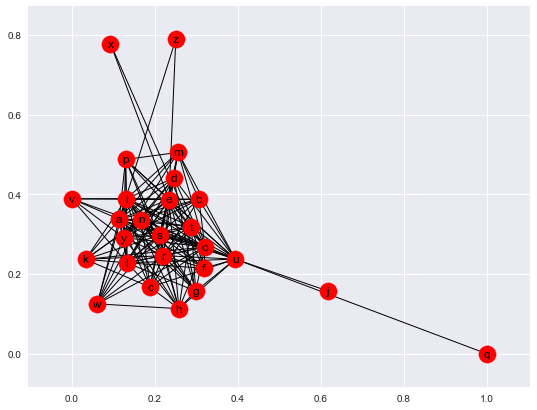

In [5]:
#visualizzazione grafica della rete tramite l'algoritmo spring_layout
pos = nx.spring_layout(G_en, dim=2, k=None, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)
plt.figure(figsize=(9,7))
nx.draw_networkx(G_en,pos)

<center>
# Italiano

In [6]:
#file txt in input 
f = open('Testo_italiano.txt', 'r')
fh = f.readlines()

lista = []
for n_line in range(len(fh)):
    punctuation='!?,.:;"\')(_-{}[]1234567890*+/'
    line = fh[n_line].translate(None, punctuation).replace('\xc3\xb9','u').replace('\xc3\xa8', 'e').replace('\u00E9', 'e').replace('\xc3\xb2','o').replace('\u00F4', 'o').replace('\xc3\xa0', 'a').replace('\n',' ').replace('\n\n',' ').replace('\xc3\xac', 'i').replace('\xc3\xa9', 'e').lower()
    for word in line:
        for letter in word:
            lista.append(letter)

In [7]:
#creazione rete
G_it = nx.Graph()
alfabeto = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
G_it.add_nodes_from(alfabeto)

In [8]:
#creazione link
for i in range(len(lista)-1):
    if G_it.edges().count((lista[i],lista[i+1])) == 0:
        G_it.add_edge(lista[i],lista[i+1], weight=1)
    else:
        G_it[lista[i]][lista[i+1]]['weight'] += 1 
for j in alfabeto:
    if G_it.edges().count(('', j)) != 0:
        G_it.remove_edge('', j)
if G_it.nodes().count(' ') != 0:
    G_it.remove_node(' ')

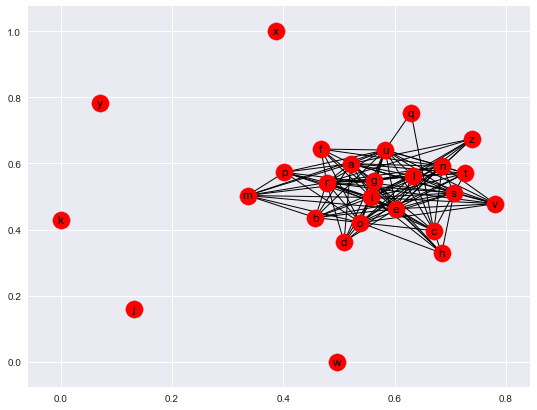

In [10]:
#visualizzazione grafica della rete tramite spring_layout
pos = nx.spring_layout(G_it, dim=2, k=None, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)
plt.figure(figsize=(9,7))
nx.draw_networkx(G_it,pos)

<center> 
# Elementi di teoria delle reti

<center>
Power law fit per la degree distribution

<center>
$\rho(k) = C k^{-\alpha}$

<center>
dove: $C=1/Z(\alpha)$ oppure $(\alpha -1)k_{min}^{\alpha -1}$

<center>
$\alpha <2$ -> caso anomalo

<center>
$2< \alpha <3$ -> scale free

<center>
$\alpha >3$ -> si avvicina alle reti random

<center> 
Analizziamo la degree distribution per la rete relativa al testo italiano
<center>
Innanzitutto guardiamo il dizionario dei degree:

In [11]:
G_it.degree()

{'a': 17,
 'b': 11,
 'c': 13,
 'd': 9,
 'e': 17,
 'f': 9,
 'g': 11,
 'h': 7,
 'i': 21,
 'j': 0,
 'k': 0,
 'l': 16,
 'm': 11,
 'n': 16,
 'o': 17,
 'p': 10,
 'q': 2,
 'r': 20,
 's': 16,
 't': 11,
 'u': 18,
 'v': 11,
 'w': 0,
 'x': 0,
 'y': 0,
 'z': 9}

<center>
Notiamo che alcuni valori di degree sono assenti nella distribuzione

<center>
Proviamo a plottare l'istogramma della degree distribution

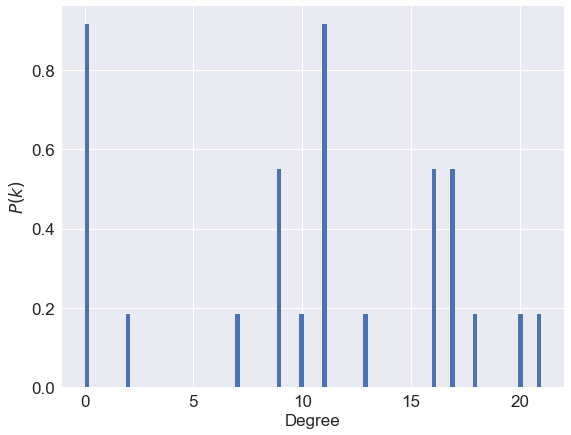

In [13]:
degree = np.array(G_it.degree().values())

plt.figure(figsize=(9,7))
plt.hist(degree, bins=100, normed=True, log=False, histtype='stepfilled')

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Degree', fontsize=17)
plt.ylabel('$P(k)$', fontsize=17)

<center>
La distribuzione è una funzione definita a tratti il cui fit non ha nessuna utilità nella descrizione e classificazione di reti con così pochi nodi

<center>
Average clustering coefficient

<center>
$\bar{C} = \frac{1}{N}\sum_{i=1}^{N} C_i.$

<center>
Dove la densità locale di links attorno al nodo i-esimo è:

<center>
$C_{i}= \dfrac{2L_i}{k_i (k_i -1)}$

<center> 
In questo caso ci aspettiamo che la densità di link attorno ai nodi corrispondenti alle lettere J, K, X, Y sia ridotta nel caso dei testi italiani rispetto a quelli inglesi, mentre è egualmente importante intorno alle vocali

In [14]:
print "L'average clustering coefficient per la rete del testo inglese è: ", nx.average_clustering(G_en)
print "L'average clustering coefficient per la rete del testo italiano è: ", nx.average_clustering(G_it)

L'average clustering coefficient per la rete del testo inglese è:  0.754754655539
L'average clustering coefficient per la rete del testo italiano è:  0.597310986624


<center>
L'average clustering coefficient è un buon indicatore per la classificazione

<center>
Numero di triangoli

<center>
$C_{tr} = $ num triple chiuse 

<center>
In questo caso ci aspettiamo che il termine sia predominante nella rete corrispondente alla lingua in cui i "suoni" a tre lettere sono più comuni

In [15]:
print "Il numero di traingoli per la rete del testo inglese è: ", float(sum(nx.triangles(G_en).values()))/3
print "Il numero di triangoli per la rete del testo italiano è: ", float(sum(nx.triangles(G_it).values()))/3

Il numero di traingoli per la rete del testo inglese è:  570.0
Il numero di triangoli per la rete del testo italiano è:  322.0


NB: il contributo maggiore sarà dato dalle vocali

<center> 
Numero di componenti connesse

<center>
Analogamente al caso dell' average clustering coefficient ci aspettiamo un'unica componente connessa nella rete relativa al testo inglese e più componenti nel caso di quello italiano, a causa dell'uso meno frequente delle lettere J, K, X, Y

In [16]:
print "Il numero di componenti connesse per la rete del testo inglese è: ", nx.number_connected_components(G_en)
print "Il numero di componenti connesse per la rete del testo italiano è: ", nx.number_connected_components(G_it)

Il numero di componenti connesse per la rete del testo inglese è:  1
Il numero di componenti connesse per la rete del testo italiano è:  6


<center>
Assortative Mixing by Degree

<center>
$r = \dfrac{\Sigma_{ij}(A_{ij}-k_ik_j/2m)k_ik_j}{\Sigma_{ij}(k_i\delta_{ij}-k_ik_j/2m)k_ik_j}$

NB: ottenuto come la covarianza normalizzata delle misure $k_i$ e $k_j$

<center>
Valutiamo il coefficiente di assortatività nelle due reti

In [17]:
print "L'assortativity coefficient per la rete del testo inglese è: ",nx.degree_assortativity_coefficient(G_en)
print "L'assortativity coefficient per la rete del testo italiano è: ",nx.degree_assortativity_coefficient(G_it)

L'assortativity coefficient per la rete del testo inglese è:  -0.343393967304
L'assortativity coefficient per la rete del testo italiano è:  -0.305080302844


<center> 
I risultati mostrano che nelle due reti le lettere (i.e nodi) con alto degree creano maggiormente link con nodi a basso degree, fondamentalmente perché le parole sono formate da una alternanza di vocali (alto degree) e consonanti (basso degree)

<center>
Questo fenomeno è maggiormente riscontrato nella rete relativa al testo inglese

<center> 
# Training 

<center>
Creazione di un dataset di file di testo

In [18]:
%%time
#grandezza dataset
N_tot = 200

#file txt in input (Dizionario inglese)
alfabeto = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
f_en = open('Dizionario_Inglese.txt', 'r')
fh_en = f_en.readlines()

N = N_tot/2
X_en = np.zeros((N,4), dtype=object) #matrice dell'input space
Y_en = []                            #lista dell'output space

#creo N testi con parole random dal dizionario
for sample in range(N):
    fh_2 = shuffle(fh_en, random_state=randint(42)) #mischio le parole
    list_sample = []
    #creo il testo di lunghezza random
    for n_line in range(randint(len(fh_2)/10, len(fh_2)/3)):
        punctuation='!?,.:;"\')(_-{}[]1234567890*+/'
        line = fh_2[n_line].translate(None, punctuation).replace('\xc3\xb9','u').replace('\xc3\xa8', 'e').replace('\u00E9', 'e').replace('\xc3\xb2','o').replace('\u00F4', 'o').replace('\xc3\xa0', 'a').replace('\n',' ').replace('\n\n',' ').replace('\xc3\xac', 'i').replace('\xc3\xa9', 'e').lower()
        for word in line:
            for letter in word:
                list_sample.append(letter)
#studio la rete di ciascun testo            
    #creazione nodi
    G_sample = nx.Graph()
    G_sample.add_nodes_from(alfabeto)
    #creazione link
    for i in range(len(list_sample)-1):
        if G_sample.edges().count((list_sample[i],list_sample[i+1])) == 0:
            G_sample.add_edge(list_sample[i],list_sample[i+1], weight=1)
        else:
            G_sample[list_sample[i]][list_sample[i+1]]['weight'] += 1 
    for j in alfabeto:
        if G_sample.edges().count(('', j)) != 0:
            G.remove_edge('', j)
    if G_sample.nodes().count(' ') != 0:
        G_sample.remove_node(' ')
    
    #calcolo un input vector e output vector per ciascun testo creato
    degree = np.array(G_sample.degree().values())
    fit_function = pwl.Fit(degree)
    #x_1 = fit_function.power_law.alpha
    x_2 = nx.average_clustering(G_sample)
    x_3 = float(sum(nx.triangles(G_sample).values()))/3
    x_4 = nx.number_connected_components(G_sample)
    x_5 = nx.degree_assortativity_coefficient(G_sample)
    X_en[sample] = [x_2, x_3, x_4, x_5]
    Y_en.append(1) #l'output del file inglese è 1
print X_en

Calculating best minimal value for power law fit
/Users/Cinus/anaconda/lib/python2.7/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calc

[[0.8752851937217779 1367.0 1 -0.25439222659173488]
 [0.8889313086093373 1479.0 1 -0.23827490768587573]
 [0.8773304704150041 1375.0 1 -0.21549151135404282]
 [0.8946668990592492 1565.0 1 -0.19510254116227602]
 [0.8847734730728611 1452.0 1 -0.23335538615420118]
 [0.8802345472762083 1366.0 1 -0.23541143948546783]
 [0.8564022199588897 1184.0 1 -0.27230912953618297]
 [0.856136960194293 1104.0 1 -0.29358190640233173]
 [0.862833823584494 1138.0 1 -0.29759617842768865]
 [0.8870625760398945 1390.0 1 -0.23474536264605303]
 [0.8839904798420543 1429.0 1 -0.23055521130498638]
 [0.870123068018426 1335.0 1 -0.23383118123283483]
 [0.8786220667072475 1491.0 1 -0.19366137744766987]
 [0.8567409852993119 1067.0 1 -0.28935037779783962]
 [0.8715108959256892 1196.0 1 -0.28416051241351026]
 [0.8725632609690928 1301.0 1 -0.25035425909607745]
 [0.8808370777007201 1330.0 1 -0.2171679955345297]
 [0.8825813111040441 1497.0 1 -0.20896343957608116]
 [0.8873523909686762 1551.0 1 -0.19783520026965165]
 [0.878541742526

Calculating best minimal value for power law fit


In [19]:
%%time
#file txt in input
alfabeto = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
f_it = open('Dizionario_Italiano.txt', 'r')
fh_it = f_it.readlines()
N = N_tot/2
X_it = np.zeros((N,4), dtype=object)
Y_it = []

for sample in range(N):
    fh_2 = shuffle(fh_it, random_state=randint(42))
    list_sample = []
    for n_line in range(randint(len(fh_2)/10, len(fh_2)/5)):
        punctuation='!?,.:;"\')(_-{}[]1234567890*+/'
        line = fh_2[n_line].translate(None, punctuation).replace('\xc3\xb9','u').replace('\xc3\xa8', 'e').replace('\u00E9', 'e').replace('\xc3\xb2','o').replace('\u00F4', 'o').replace('\xc3\xa0', 'a').replace('\n',' ').replace('\n\n',' ').replace('\xc3\xac', 'i').replace('\xc3\xa9', 'e').lower()
        for word in line:
            for letter in word:
                list_sample.append(letter)       
    #creazione nodi
    G_sample = nx.Graph()
    G_sample.add_nodes_from(alfabeto)
    #creazione link
    for i in range(len(list_sample)-1):
        if G_sample.edges().count((list_sample[i],list_sample[i+1])) == 0:
            G_sample.add_edge(list_sample[i],list_sample[i+1], weight=1)
        else:
            G_sample[list_sample[i]][list_sample[i+1]]['weight'] += 1 
    for j in alfabeto:
        if G_sample.edges().count(('', j)) != 0:
            G.remove_edge('', j)
    if G_sample.nodes().count(' ') != 0:
        G_sample.remove_node(' ')
    
    #input vector
    degree = np.array(G_sample.degree().values())
    fit_function = pwl.Fit(degree)
    #x_1 = fit_function.power_law.alpha
    x_2 = nx.average_clustering(G_sample)
    x_3 = float(sum(nx.triangles(G_sample).values()))/3
    x_4 = nx.number_connected_components(G_sample)
    x_5 = nx.degree_assortativity_coefficient(G_sample)
    X_it[sample] = [x_2, x_3, x_4, x_5]
    Y_it.append(0) #l'output del file inglese è 0
print X_it

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than

[[0.6884586154967992 647.0 6 -0.29436655652986082]
 [0.6868110962538205 658.0 6 -0.29821142813598944]
 [0.6743544998618957 604.0 6 -0.31168782037944537]
 [0.6918229110007574 682.0 6 -0.26616378991292861]
 [0.6882680657835457 620.0 6 -0.29934473924111682]
 [0.6733098677113124 612.0 6 -0.30075202264882922]
 [0.6873604500711484 657.0 6 -0.25459919412090093]
 [0.6918229110007574 682.0 6 -0.26616378991292861]
 [0.6856369894295591 636.0 6 -0.30278143663712792]
 [0.6823770653406016 622.0 6 -0.29055900678837193]
 [0.6914927368321884 627.0 6 -0.32238424991072945]
 [0.6910739102413139 640.0 6 -0.30333791342680144]
 [0.6946838087188965 666.0 6 -0.31269570003757702]
 [0.6946117601745642 648.0 6 -0.3130841373591276]
 [0.6890114904906787 672.0 6 -0.30531362801959072]
 [0.6959314672764966 665.0 6 -0.3053773087432633]
 [0.6887134295459028 657.0 6 -0.32327972456727816]
 [0.6881265261640218 647.0 6 -0.27697011281793071]
 [0.6832850961419932 616.0 6 -0.31767347061890516]
 [0.6847765358773271 631.0 6 -0.3

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [20]:
#Concateno i due dataset per crearne uno unico e mischiato
X = np.concatenate((X_it, X_en), axis=0)
Y = np.concatenate((Y_it, Y_en), axis=0)

from sklearn.utils import shuffle
X_all, Y_all = shuffle(X, Y, random_state=42)

<center> 
# Testing 

In [39]:
#file txt in input
testo = input ('Scegli il testo:\n 0 <- Italiano\n 1 <- Inglese\n')
if testo == 1:
    f = open('Testo_inglese.txt', 'r')
elif testo == 0:
    f = open('Testo_italiano.txt', 'r')
else:
    print "Scelta sbagliata"

    
fh = f.readlines()

lista = []
for n_line in range(len(fh)):
    punctuation='!?,.:;"\')(_-{}[]1234567890*+/'
    line = fh[n_line].translate(None, punctuation).replace('\xc3\xb9','u').replace('\xc3\xa8', 'e').replace('\u00E9', 'e').replace('\xc3\xb2','o').replace('\u00F4', 'o').replace('\xc3\xa0', 'a').replace('\n',' ').replace('\n\n',' ').replace('\xc3\xac', 'i').replace('\xc3\xa9', 'e').lower()
    for word in line:
        for letter in word:
            lista.append(letter)

Scegli il testo:
 0 <- Italiano
 1 <- Inglese
0


In [40]:
#creazione rete
G=nx.Graph()
alfabeto = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
G.add_nodes_from(alfabeto)

In [41]:
#creazione link
for i in range(len(lista)-1):
    if G.edges().count((lista[i],lista[i+1])) == 0:
        G.add_edge(lista[i],lista[i+1], weight=1)
    else:
        G[lista[i]][lista[i+1]]['weight'] += 1 
for j in alfabeto:
    if G.edges().count(('', j)) != 0:
        G.remove_edge('', j)
if G.nodes().count(' ') != 0:
    G.remove_node(' ')

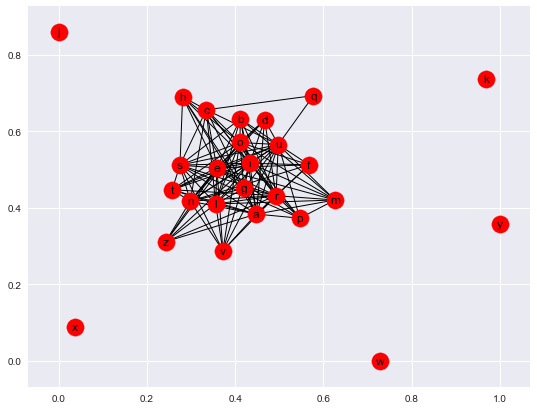

In [42]:
#visualizzazione grafica della rete
pos = nx.spring_layout(G, dim=2, k=None, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)
plt.figure(figsize=(9,7))
nx.draw_networkx(G,pos)

In [43]:
#input vector
degree = np.array(G.degree().values())
fit_function = pwl.Fit(degree)
x_1 = fit_function.power_law.alpha
x_2 = nx.average_clustering(G)
x_3 = float(sum(nx.triangles(G).values()))/3
x_4 = nx.number_connected_components(G)
x_5 = nx.degree_assortativity_coefficient(G)
X_test = [x_2, x_3, x_4, x_5]
Y_test = [1]
print X_test

[0.5973109866239182, 322.0, 6, -0.30508030284405097]


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#model =  MLPClassifier((100,50,10),activation='relu',solver='adam', max_iter=300000000, learning_rate='adaptive', random_state=0)
#model = RandomForestClassifier(max_depth=5, n_estimators=50)
model = GaussianNB()
model.fit(X_all, Y_all)

if model.predict(X_test)== 0:
    print "Il testo è in italiano"
else:
    print "Il testo è in inglese"

Il testo è in italiano


/Users/Cinus/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [ ]:
#%%time
import numpy as np
from scipy import misc
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

N = 50
X_it = np.zeros((N,786432))
y_it = []
for i in range(N):
    pos = nx.spring_layout(G, dim=2, k=None, pos=None, fixed=None, iterations=randint(100), weight='weight')
    sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': '0',  'xtick.color': '0','ytick.color': '0'})
    plt.figure(figsize=(6,4))
    nx.draw_networkx(G,pos)
    savefig('Image_it.png')
    img = misc.imread('Image_it.png');
    img = misc.face(gray=True)
    [width1,height1]=[img.shape[0],img.shape[1]]
    img_2 = img.reshape(width1*height1);
    X_it[i] = img_2
    y_it.append(0)
X_it

In [ ]:
#file txt in input
F = open('Testo_inglese.txt', 'r')
Fh = F.readlines()

Lista = []
for n_line in range(len(Fh)):
    punctuation='!?,.:;"\')(_-{}[]1234567890*+/'
    line = Fh[n_line].translate(None, punctuation).replace('\xc3\xb9','u').replace('\xc3\xa8', 'e').replace('\u00E9', 'e').replace('\xc3\xb2','o').replace('\u00F4', 'o').replace('\xc3\xa0', 'a').replace('\n',' ').replace('\n\n',' ').replace('\xc3\xac', 'i').replace('\xc3\xa9', 'e').lower()
    for word in line:
        for letter in word:
            Lista.append(letter)

In [ ]:
#creazione rete
g = nx.Graph()
alfabeto = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
g.add_nodes_from(alfabeto)

In [ ]:
#creazione link
for i in range(len(Lista)-1):
    if g.edges().count((Lista[i],Lista[i+1])) == 0:
        g.add_edge(Lista[i],Lista[i+1], weight=1)
    else:
        g[Lista[i]][Lista[i+1]]['weight'] += 1 
for j in alfabeto:
    if g.edges().count(('', j)) != 0:
        g.remove_edge('', j)
if g.nodes().count(' ') != 0:
    g.remove_node(' ')
    

In [ ]:
#visualizzazione grafica della rete inglese
pos = nx.spring_layout(g, dim=2, k=None, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0)
plt.figure(figsize=(8,6))
nx.draw_networkx(g,pos)

In [ ]:
#%%time
import numpy as np
from scipy import misc
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_en = np.zeros((N,786432))
y_en = []
for i in range(N):
    pos = nx.spring_layout(G, dim=2, k=None, pos=None, fixed=None, iterations=randint(100), weight='weight')
    sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': '0',  'xtick.color': '0','ytick.color': '0'})
    plt.figure(figsize=(6,4))
    nx.draw_networkx(g,pos)
    savefig('Image_en.png')
    img = misc.imread('Image_en.png');
    img = misc.face(gray=True)
    [width1,height1]=[img.shape[0],img.shape[1]]
    img_2 = img.reshape(width1*height1);
    X_en[i] = img_2
    y_en.append(1)
X_en.shape

In [ ]:
X = np.concatenate((X_it, X_en), axis=0)
y = np.concatenate((y_it, y_en), axis=0)

from sklearn.utils import shuffle
X_all, y_all = shuffle(X, y, random_state=42)

In [ ]:
from sklearn.decomposition import PCA   
pca = PCA(800)
pca.fit(X_all)
U = pca.transform(X_all)
svm.fit(X_all,y_all)


In [ ]:
img = misc.imread('Image_it.png');
img = misc.face(gray=True)
[width1,height1]=[img.shape[0],img.shape[1]]
img_2 = img.reshape(width1*height1);
X_test = img_2

y_test = svm.predict(X_test)
y_test

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(kernel='rbf')
gammas = np.logspace(-30, -15, 10)
scores = []
for gamma in gammas:
    svm.gamma = gamma #1500<-pti dataset, K<-pti validationset K=1500/cv, cv= <-num di suddivisioni di 1500 in K pti
    cv_scores = cross_val_score(svm, X_all, Y_all, cv=2, n_jobs=4)#cv=3 è il numero di suddivisioni del dataset 
    #crea un vettore con tutte le accuratezze di ciascuna suddivisione possibile 
    #(i.e divido il dataset in 3 parti e una la considero validationset e calcolo lo score, poi lo calcolo considerando la parte 2 come validationset..)
    scores.append(np.mean(cv_scores))
    
print 'Best gamma:', gammas[np.argmax(scores)]
print 'Best score:', scores[np.argmax(scores)]

semilogx(gammas, scores)
plt.xlabel('gamma')
plt.ylabel('Score (accuracy)')

In [ ]:
from sklearn.neural_network import MLPClassifier

model =  MLPClassifier((100,50,10),activation='relu',solver='adam', max_iter=300000000,
                                                  learning_rate='adaptive', random_state=0)

model.fit(X_all, y_all)


In [ ]:
img = misc.imread('Image_it.png');
img = misc.face(gray=True)
[width1,height1]=[img.shape[0],img.shape[1]]
img_2 = img.reshape(width1*height1);
X_test = img_2

y_test = model.predict(X_test)
y_test